In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Read and clean data

In [4]:
raw_data = pd.read_csv(r"data/UCL_football_data.csv")
raw_data.head()

,id_player,id_team,player_name,nationality,field_position,age,team_country,team,assists,corners_taken,...,outside_area,right_foot,left_foot,head,other,penalties_scored,distance_covered.km.h.,top_speed,minutes_played,matches_appareance
0,74699,50051,Luka Modrić,Croatia,Midfielder,39,Spain,Real Madrid C.F.,1,9,...,0,0,0,0,0,0,22.34,29.47,187,4
1,98023,50138,Henrikh Mkhitaryan,Armenia,Midfielder,35,Italy,FC Internazionale Milano,0,0,...,0,0,0,0,0,0,24.90,31.41,177,4
2,102153,52797,Vladimír Weiss,Slovakia,Midfielder,34,Slovakia,ŠK Slovan Bratislava,0,0,...,0,0,0,0,0,0,14.68,32.43,139,2
3,103335,50124,Axel Witsel,Belgium,Midfielder,35,Spain,Atlético de Madrid,0,0,...,0,0,0,0,0,0,31.08,30.32,271,4
4,103806,50138,Matteo Darmian,Italy,Defender,34,Italy,FC Internazionale Milano,0,0,...,0,0,0,0,0,0,20.21,33.07,165,2


In [5]:
# raw_data.info()
raw_data.describe()

,id_player,id_team,age,assists,corners_taken,offsides,dribbles,total_attempts,attempts_on_target,attempts_off_target,...,outside_area,right_foot,left_foot,head,other,penalties_scored,distance_covered.km.h.,top_speed,minutes_played,matches_appareance
count,6.760000e+02,6.760000e+02,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,2.429669e+08,2.768302e+05,25.180473,0.233728,0.979290,0.377219,2.997041,2.763314,0.998521,1.032544,...,0.050296,0.159763,0.102071,0.035503,0.005917,0.032544,22.983979,31.729763,186.162722,3.002959
std,4.109128e+07,7.264563e+05,4.267705,0.567086,2.689268,0.829823,4.411768,3.313749,1.607850,1.428433,...,0.231868,0.523161,0.392442,0.200547,0.076752,0.222058,13.948548,2.068167,117.578973,1.081833
min,7.469900e+04,7.889000e+03,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.330000,20.810000,1.000000,1.000000
25%,2.500792e+08,5.005100e+04,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.742500,30.667500,85.750000,2.000000
50%,2.501174e+08,5.013800e+04,25.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.835000,31.985000,182.500000,3.000000
75%,2.501586e+08,5.275800e+04,28.000000,0.000000,0.000000,0.000000,4.000000,4.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.252500,33.142500,286.250000,4.000000
max,2.502003e+08,2.603790e+06,39.000000,4.000000,21.000000,8.000000,34.000000,21.000000,12.000000,8.000000,...,2.000000,5.000000,4.000000,2.000000,1.000000,3.000000,50.460000,36.550000,360.000000,4.000000


In [6]:
data = raw_data.copy(deep=True)

In [7]:
# Remove unnecessary columns
to_remove_columns = ['inside_area', 'outside_area', 'left_foot', 'right_foot', 'head', 'other', 'penalties_scored', 'X']
data.drop(to_remove_columns, axis=1, inplace=True)

In [8]:
# TODO: Add new columns like distance covered over minutes played?

In [9]:
# Add contribution
data['contribution'] = data['goals'] + data['assists']
print(f"0  contribution = {sum(data['contribution'] == 0)}")
print(f"1+ contribution = {data['contribution'].count()}")
print(f"Non contribution percentage = {np.round(sum(data['contribution'] == 0)/data['contribution'].count()*100, 2)}%")
data['contribution'].describe()

0  contribution = 465
1+ contribution = 676
Non contribution percentage = 68.79%


count    676.000000
mean       0.538462
std        1.003697
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: contribution, dtype: float64

In [10]:
# Divide by matches_appareance to get the data in a per game basis
# TODO: Do i remove minutes played as well?
adjusted_data = (data.select_dtypes('number')
                 .drop(["id_player", "top_speed", "id_team", "age"], axis=1)
                 .div(data['matches_appareance'], axis=0))
adjusted_data[["id_player", "top_speed", "id_team", "age", "field_position"]] = data[["id_player", "top_speed", "id_team", "age", "field_position"]]
adjusted_data.head()

,assists,corners_taken,offsides,dribbles,total_attempts,attempts_on_target,attempts_off_target,blocked,balls_recovered,tackles,...,goals,distance_covered.km.h.,minutes_played,matches_appareance,contribution,id_player,top_speed,id_team,age,field_position
0,0.25,2.25,0.00,0.25,0.5,0.25,0.25,0.0,1.75,1.00,...,0.0,5.585,46.75,1.0,0.25,74699,29.47,50051,39,Midfielder
1,0.00,0.00,0.25,0.50,1.5,0.25,0.75,0.5,2.50,1.00,...,0.0,6.225,44.25,1.0,0.00,98023,31.41,50138,35,Midfielder
2,0.00,0.00,0.00,3.00,0.5,0.00,0.00,0.5,3.00,4.50,...,0.0,7.340,69.50,1.0,0.00,102153,32.43,52797,34,Midfielder
3,0.00,0.00,0.00,0.25,0.0,0.00,0.00,0.0,6.50,1.75,...,0.0,7.770,67.75,1.0,0.00,103335,30.32,50124,35,Midfielder
4,0.00,0.00,0.00,0.00,0.5,0.00,0.00,0.5,2.00,2.00,...,0.0,10.105,82.50,1.0,0.00,103806,33.07,50138,34,Defender


In [20]:
adjusted_data.columns

Index(['assists', 'corners_taken', 'offsides', 'dribbles', 'total_attempts',
       'attempts_on_target', 'attempts_off_target', 'blocked',
       'balls_recovered', 'tackles', 'tackles_won', 'tackles_lost',
       'clearance_attempted', 'X', 'fouls_committed', 'fouls_suffered',
       'yellow_cards', 'red_cards', 'passing_accuracy...', 'passes_attempted',
       'passes_completed', 'crossing_accuracy...', 'crosses_attempted',
       'crosses_completed', 'free_kick_taken', 'goals',
       'distance_covered.km.h.', 'minutes_played', 'matches_appareance',
       'contribution', 'id_player', 'top_speed', 'id_team', 'age',
       'field_position'],
      dtype='object')

### Single variable analysis

#### Assist and goal

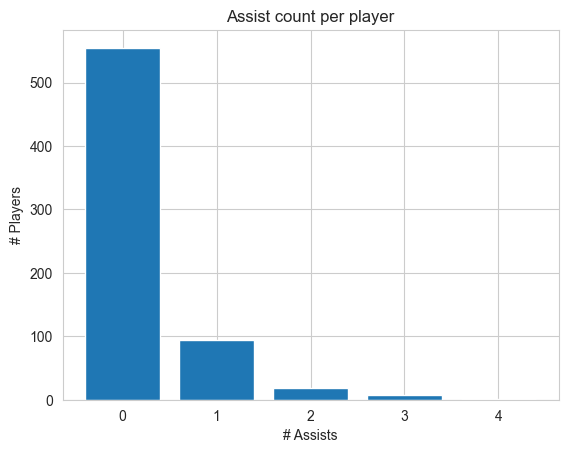

In [32]:
plt.title("Assist count per player")
plt.xlabel("# Assists")
plt.ylabel("# Players")
plt.bar(data['assists'].value_counts().index, data['assists'].value_counts().values)
plt.show()
# data['assists'].values

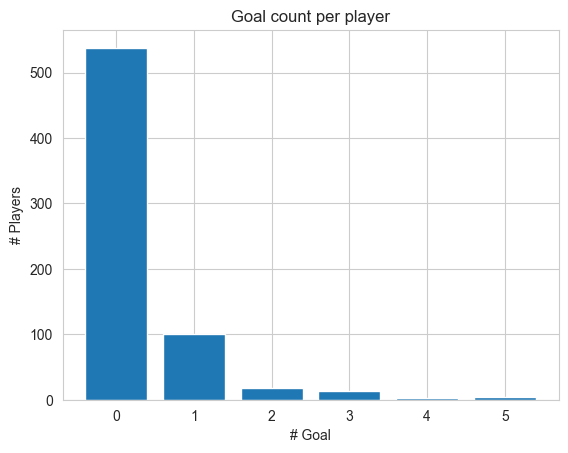

In [34]:
plt.title("Goal count per player")
plt.xlabel("# Goal")
plt.ylabel("# Players")
plt.bar(data['goals'].value_counts().index, data['goals'].value_counts().values)
plt.show()
# data['assists'].values

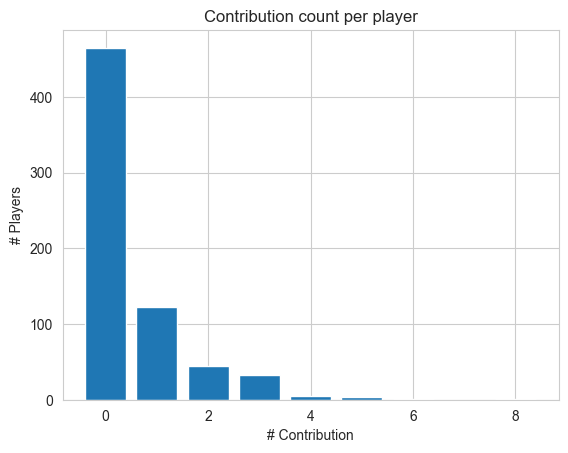

In [35]:
plt.title("Contribution count per player")
plt.xlabel("# Contribution")
plt.ylabel("# Players")
plt.bar(data['contribution'].value_counts().index, data['contribution'].value_counts().values)
plt.show()

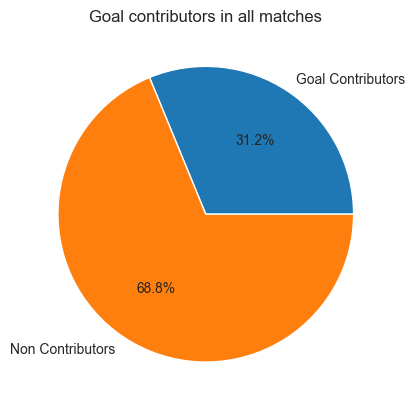

In [55]:
contributor_count = data['contribution'].apply(lambda x: (x!= 0)).sum()
plt.title("Goal contributors in all matches")
plt.pie([contributor_count, len(data) - contributor_count], labels=["Goal Contributors", "Non Contributors"], autopct='%1.1f%%')
# plt.pie([1, 2], labels=["1+ Contribution", "No contribution"])
plt.show()

#### Attempts

In [67]:
print(sum(data['total_attempts'] == data['attempts_off_target'] + data['attempts_on_target']))

390


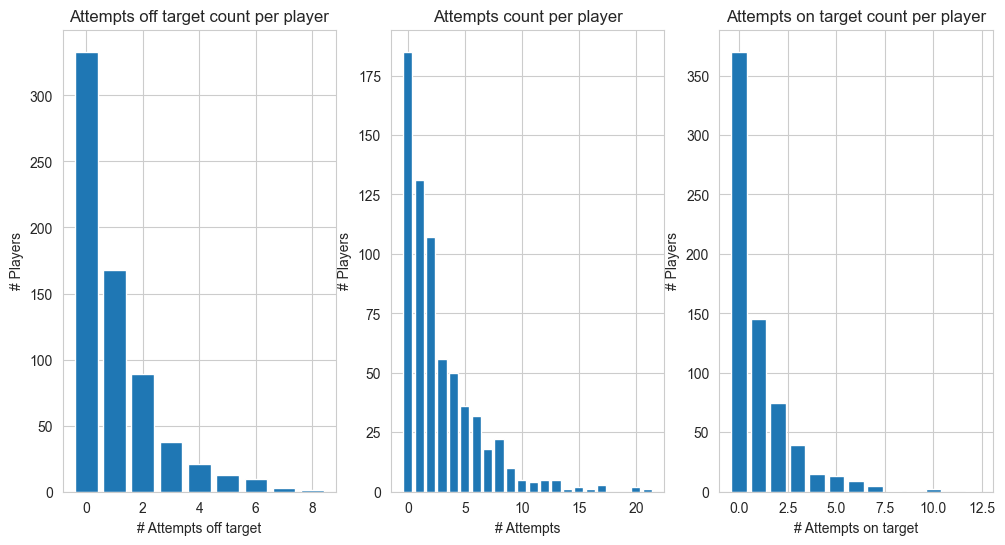

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

ax[0].set_title("Attempts off target count per player")
ax[0].set_xlabel("# Attempts off target")
ax[0].set_ylabel("# Players")
ax[0].bar(data['attempts_off_target'].value_counts().index, data['attempts_off_target'].value_counts().values)

ax[2].set_title("Attempts on target count per player")
ax[2].set_xlabel("# Attempts on target")
ax[2].set_ylabel("# Players")
ax[2].bar(data['attempts_on_target'].value_counts().index, data['attempts_on_target'].value_counts().values)

ax[1].set_title("Attempts count per player")
ax[1].set_xlabel("# Attempts")
ax[1].set_ylabel("# Players")
ax[1].bar(data['total_attempts'].value_counts().index, data['total_attempts'].value_counts().values)
plt.show()

#### Generic stuff

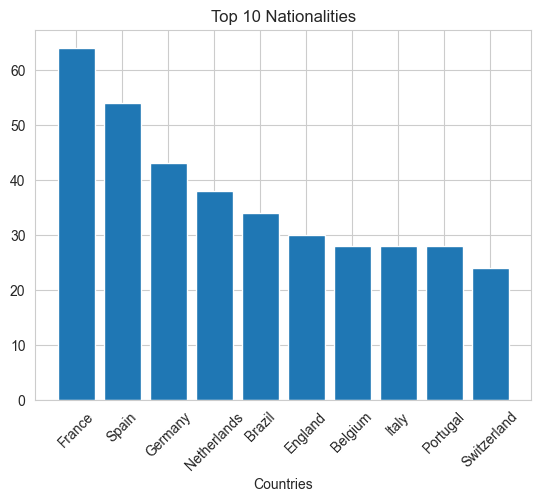

In [92]:
tmp = data['nationality'].value_counts().sort_values(ascending=False)[:10]
plt.bar(tmp.index, tmp.values)
plt.xticks(rotation=45)
plt.xlabel("Countries")
plt.title("Top 10 Nationalities")
plt.show()

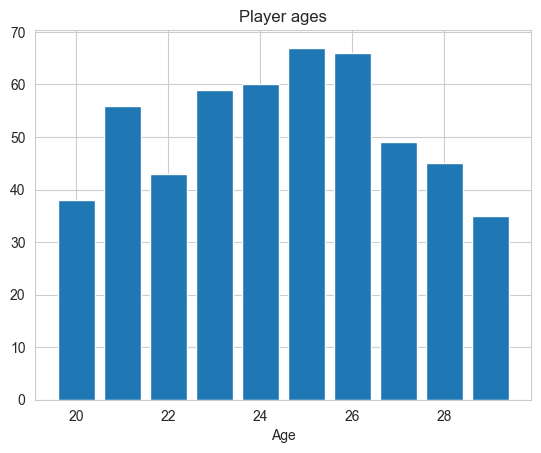

In [94]:
tmp = data['age'].value_counts().sort_values(ascending=False)[:10]
plt.bar(tmp.index, tmp.values)
# plt.xticks(rotation=45)
plt.xlabel("Age")
plt.title("Player ages")
plt.show()

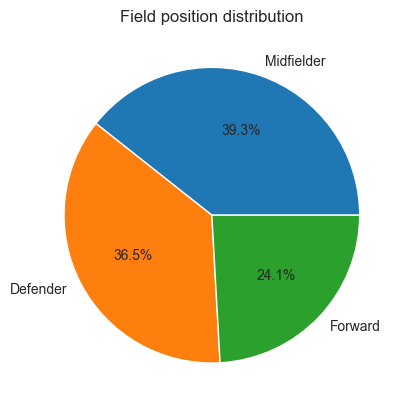

In [100]:
tmp = data['field_position'].value_counts().sort_values(ascending=False)[:10]
plt.pie(tmp.values, labels=tmp.index, autopct='%1.1f%%')
plt.title("Field position distribution")
plt.show()

#### Key stats

np.int64(360)

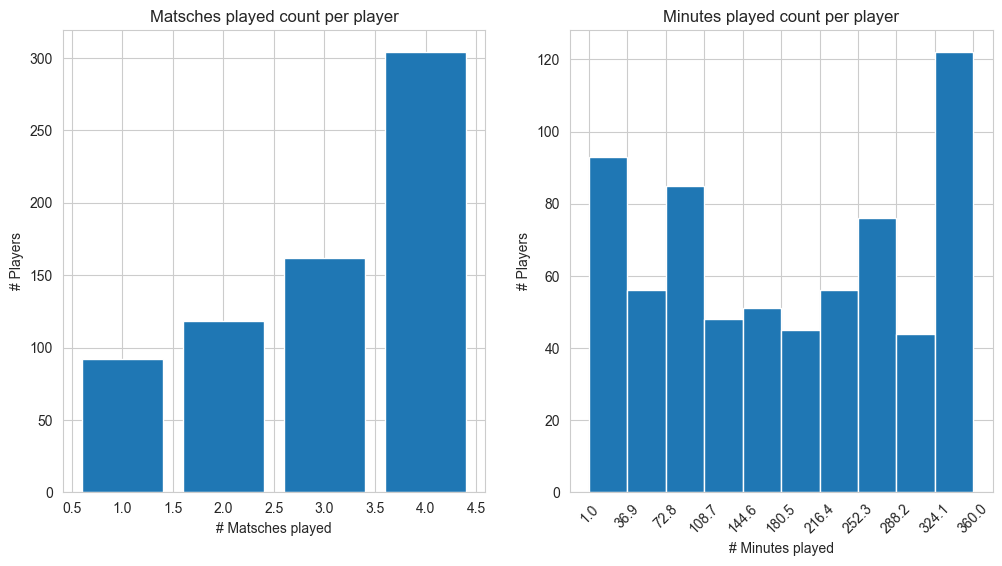

In [119]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].set_title("Matsches played count per player")
ax[0].set_xlabel("# Matsches played")
ax[0].set_ylabel("# Players")
ax[0].bar(data['matches_appareance'].value_counts().index, data['matches_appareance'].value_counts().values)

ax[1].set_title("Minutes played count per player")
ax[1].set_xlabel("# Minutes played")
ax[1].set_ylabel("# Players")
_, bins, _ = ax[1].hist(data['minutes_played'], bins=10)
ax[1].set_xticks(bins)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(45)
plt.show()

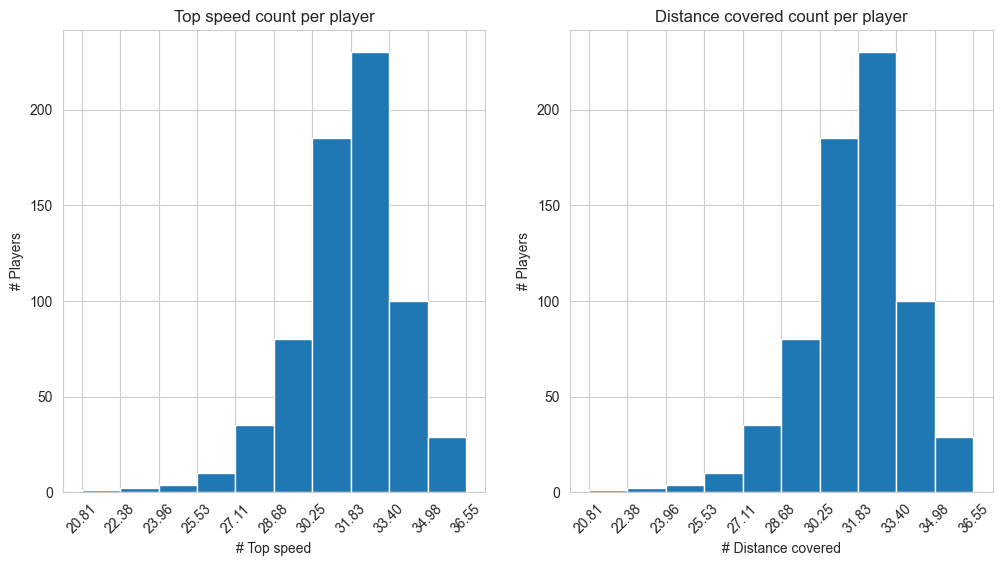

In [127]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].set_title("Top speed count per player")
ax[0].set_xlabel("# Top speed")
ax[0].set_ylabel("# Players")
_, bins, _ = ax[0].hist(data['top_speed'], bins=10)
ax[0].set_xticks(bins)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(45)

ax[1].set_title("Distance covered count per player")
ax[1].set_xlabel("# Distance covered")
ax[1].set_ylabel("# Players")
_, bins, _ = ax[1].hist(data['top_speed'], bins=10)
ax[1].set_xticks(bins)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Correlation stuff

In [12]:
# Get correlation data
correlation_matrix = adjusted_data.select_dtypes("number").corr()
correlation_matrix['contribution'].sort_values(ascending=False)[:10]

contribution              1.000000
goals                     0.817458
assists                   0.674487
attempts_on_target        0.635259
total_attempts            0.567718
attempts_off_target       0.338352
dribbles                  0.313296
minutes_played            0.245632
distance_covered.km.h.    0.242858
blocked                   0.241738
Name: contribution, dtype: float64

In [13]:
# Grouping to show the mean
grouped_data = adjusted_data.groupby('contribution') 

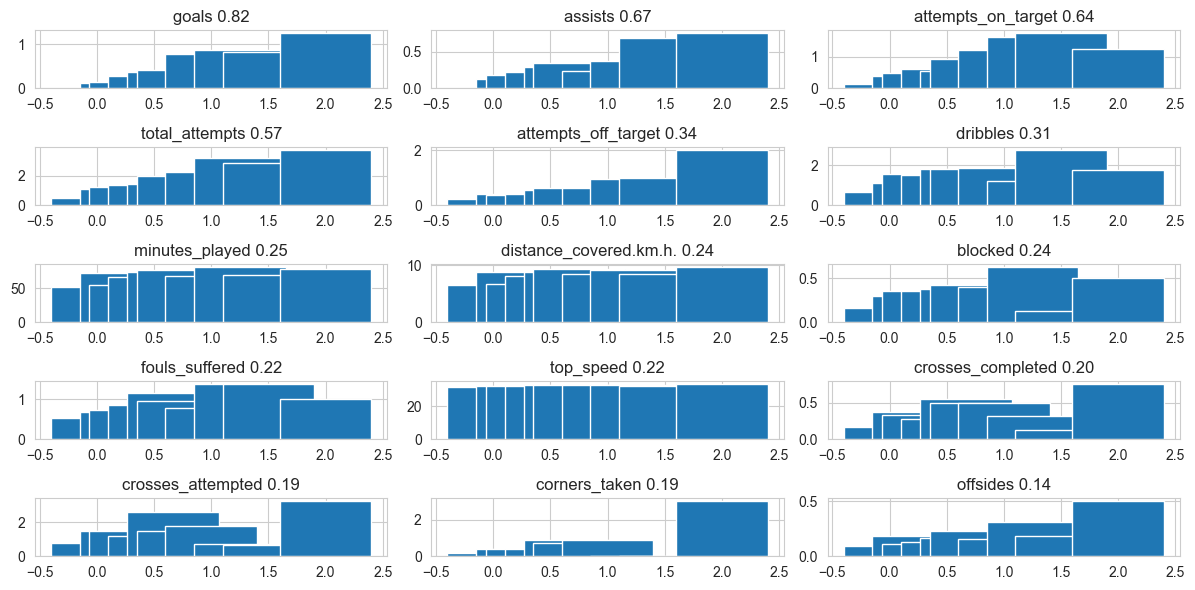

In [14]:
nrows, ncols = 5, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))
for idx, column in enumerate(correlation_matrix['contribution'].sort_values(ascending=False)[1:nrows*ncols+1].index):
    ax = axes[idx//3][idx%3]
    # ax.set_title(column)
    ax.set_title(f"{column} {correlation_matrix['contribution'][column]:.2f}")
    ax.bar(grouped_data[column].mean().index, grouped_data[column].mean().values)
plt.tight_layout()
plt.show()

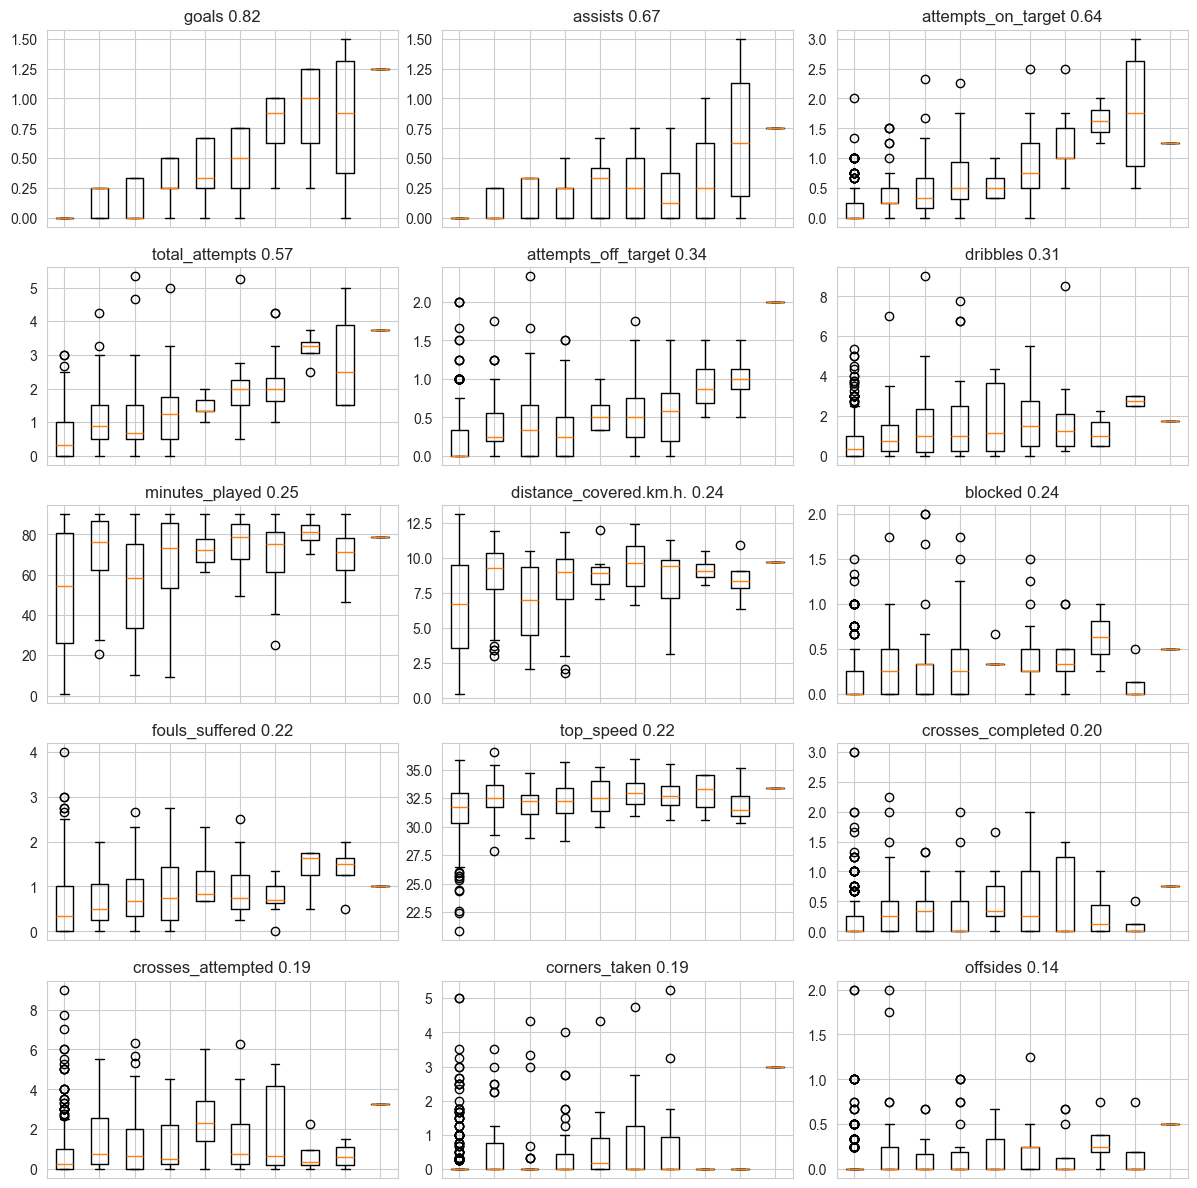

In [15]:
nrows, ncols = 5, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))
for idx, column in enumerate(correlation_matrix['contribution'].sort_values(ascending=False)[1:nrows*ncols+1].index):
    ax = axes[idx//3][idx%3]
    tmp_grouped_data = [group[column].values for name, group in adjusted_data.groupby('contribution')]
    
    ax.boxplot(tmp_grouped_data, tick_labels=adjusted_data['contribution'].unique())
    ax.set_title(f"{column} {correlation_matrix['contribution'][column]:.2f}")
    # ax.tick_params(axis='x', rotation=45)
    # ax.bar(grouped_data[column].mean().index, grouped_data[column].mean().values)
    ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
plt.tight_layout()
plt.show()

### Let's look at defender

In [16]:
adjusted_data['field_position'].value_counts()

field_position
Midfielder    266
Defender      247
Forward       163
Name: count, dtype: int64

In [17]:
adjusted_data.groupby('field_position')['contribution'].mean()

field_position
Defender      0.081309
Forward       0.295501
Midfielder    0.135965
Name: contribution, dtype: float64

In [18]:
adjusted_data.groupby('field_position')['contribution'].apply(lambda x: (x!= 0).sum())

field_position
Defender      54
Forward       79
Midfielder    78
Name: contribution, dtype: int64

### Extras for later